# Importación librerias para analisis y visualización de datos

In [61]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


# Importación de datos 

In [62]:
url ="/content/drive/MyDrive/Caso analisis de datos 1 /DatosSeguros.csv"
df = pd.read_csv(url)

df 

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.90,0,yes,Caribe,16884.9240
1,19,F,27.90,0,yes,Caribe,16884.9240
2,19,F,27.90,0,yes,Caribe,16884.9240
3,18,M,33.77,1,no,Cundinamarca,1725.5523
4,28,M,33.00,3,no,Cundinamarca,4449.4620
...,...,...,...,...,...,...,...
1344,18,F,36.85,0,no,Cundinamarca,1629.8335
1345,19,F,27.90,0,yes,Caribe,16884.9240
1346,21,F,25.80,0,no,Caribe,2007.9450
1347,61,F,29.07,0,yes,Antioquia,29141.3603


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [64]:
df.corr()

,edad,imc,hijos,valor_seguro
edad,1.000000,0.113238,0.049713,0.295750
imc,0.113238,1.000000,0.012627,0.198978
hijos,0.049713,0.012627,1.000000,0.069352
valor_seguro,0.295750,0.198978,0.069352,1.000000


In [65]:
print("region:", df["region"].unique(), "\n")

region: ['Caribe' 'Cundinamarca' 'Antioquia' 'Boyaca'] 



In [66]:
df["region"].replace(["Caribe","Cundinamarca", "Antioquia","Boyaca"], [0,1,2,3 ], inplace=True)

In [67]:
df["fumador"].replace(["no","yes"], [0,1], inplace=True)
df["sexo"].replace(["F","M"], [0,1], inplace=True)

In [68]:
# Calculamos la media 
media = df['fumador'].mean()
media1 = df['imc'].mean()

# Reemplazamos los valores nulos por la media
df['fumador'].fillna(media, inplace=True)
df['imc'].fillna(media1, inplace=True)

In [69]:
# Cambiamos el tipo de dato 
df["fumador"]=df["fumador"].apply(int)

In [70]:
df

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,0,27.90,0,1,0,16884.9240
1,19,0,27.90,0,1,0,16884.9240
2,19,0,27.90,0,1,0,16884.9240
3,18,1,33.77,1,0,1,1725.5523
4,28,1,33.00,3,0,1,4449.4620
...,...,...,...,...,...,...,...
1344,18,0,36.85,0,0,1,1629.8335
1345,19,0,27.90,0,1,0,16884.9240
1346,21,0,25.80,0,0,0,2007.9450
1347,61,0,29.07,0,1,2,29141.3603


In [71]:
# Visualizamos nuevameta la corrrelación 

df.corr()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
edad,1.000000,-0.012712,0.113140,0.049713,-0.038521,0.007847,0.295750
sexo,-0.012712,1.000000,0.043803,0.024605,0.063360,0.005834,0.056572
imc,0.113140,0.043803,1.000000,0.012622,-0.002508,-0.157248,0.198972
hijos,0.049713,0.024605,0.012622,1.000000,-0.003088,-0.007248,0.069352
fumador,-0.038521,0.063360,-0.002508,-0.003088,1.000000,-0.011504,0.778955
region,0.007847,0.005834,-0.157248,-0.007248,-0.011504,1.000000,0.003466
valor_seguro,0.295750,0.056572,0.198972,0.069352,0.778955,0.003466,1.000000


# Explorando datos -  tendencias y patrones 

In [72]:
# Personas que fuman y son hombres 

result = df[(df['fumador'] == 1) & (df['sexo'] == 1)]
result

,edad,sexo,imc,hijos,fumador,region,valor_seguro
16,27,1,42.130,0,1,1,39611.75770
21,30,1,35.300,0,1,0,36837.46700
31,31,1,36.300,2,1,0,38711.00000
32,22,1,35.600,0,1,0,35585.57600
36,28,1,36.400,1,1,0,51194.55914
...,...,...,...,...,...,...,...
1308,62,1,30.875,3,1,2,46718.16325
1310,43,1,27.800,0,1,0,37829.72420
1311,42,1,24.605,2,1,3,21259.37795
1314,32,1,28.120,4,1,2,21472.47880


In [73]:
result.valor_seguro.mean()

33129.24040591196

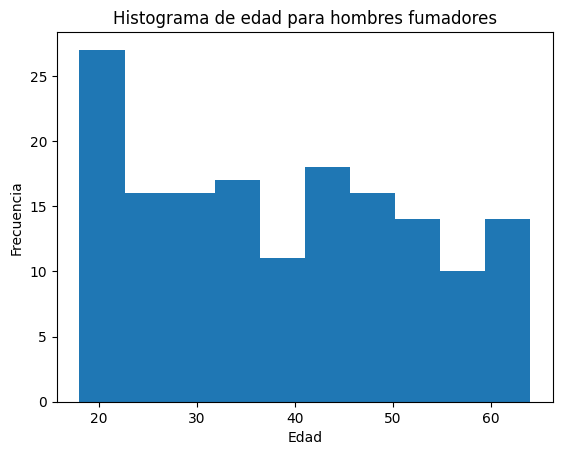

In [74]:
plt.hist(result['edad'], bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad para hombres fumadores')
plt.show()

In [75]:
# Personas que fuman y son mujeres 


result_1 = df[(df['fumador'] == 1) & (df['sexo'] == 0)]
result_1

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,0,27.90,0,1,0,16884.9240
1,19,0,27.90,0,1,0,16884.9240
2,19,0,27.90,0,1,0,16884.9240
13,62,0,26.29,0,1,1,27808.7251
25,34,0,31.92,1,1,3,37701.8768
...,...,...,...,...,...,...,...
1340,19,0,27.90,0,1,0,16884.9240
1341,19,0,27.90,0,1,0,16884.9240
1345,19,0,27.90,0,1,0,16884.9240
1347,61,0,29.07,0,1,2,29141.3603


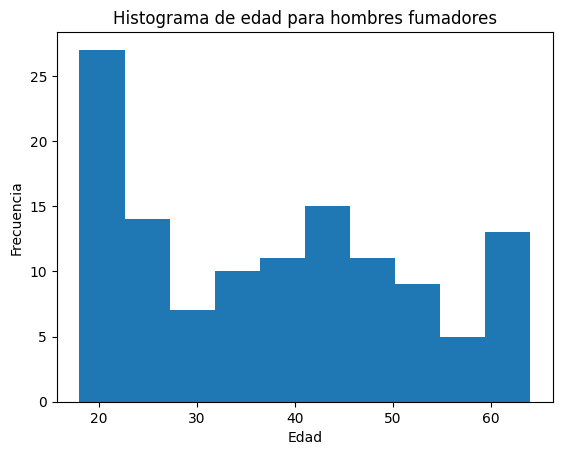

In [76]:
plt.hist(result_1['edad'], bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad para hombres fumadores')
plt.show()

In [77]:
result_1.valor_seguro.mean()

29914.438129508195

In [78]:
result_2 = df[(df['fumador'] == 0) & (df['sexo'] == 1)]
result_2

,edad,sexo,imc,hijos,fumador,region,valor_seguro
3,18,1,33.770,1,0,1,1725.55230
4,28,1,33.000,3,0,1,4449.46200
5,33,1,22.705,0,0,2,21984.47061
6,32,1,28.880,0,0,2,3866.85520
10,37,1,29.830,2,0,3,6406.41070
...,...,...,...,...,...,...,...
1331,31,1,25.935,1,0,2,4239.89265
1332,61,1,33.535,0,0,3,13143.33665
1334,51,1,30.030,1,0,1,9377.90470
1336,52,1,38.600,2,0,0,10325.20600


In [79]:
result_2.valor_seguro.mean()

8151.933982955853

In [80]:
result_3 = df[(df['fumador'] == 0) & (df['sexo'] == 0)]
result_3

,edad,sexo,imc,hijos,fumador,region,valor_seguro
7,31,0,25.74,0,0,1,3756.62160
8,46,0,33.44,1,0,1,8240.58960
9,37,0,27.74,3,0,2,7281.50560
11,60,0,25.84,0,0,2,28923.13692
15,56,0,39.82,0,0,1,11090.71780
...,...,...,...,...,...,...,...
1338,23,0,33.40,0,0,0,10795.93733
1339,52,0,44.70,3,0,0,11411.68500
1343,18,0,31.92,0,0,3,2205.98080
1344,18,0,36.85,0,0,1,1629.83350


In [81]:
result_3.valor_seguro.mean()

8762.297299541133

In [82]:
df.shape

(1349, 7)

In [83]:
# Personas por debajo del peso normal 

df_filtrado = df[df['imc'] < 18]
df_filtrado

,edad,sexo,imc,hijos,fumador,region,valor_seguro
30,23,1,17.385,1,0,2,2775.19215
130,32,0,17.765,2,1,2,32734.18630
174,18,1,15.960,0,0,3,1694.79640
234,19,0,17.800,0,0,0,1727.78500
252,18,1,17.290,2,1,3,12829.45510
382,27,0,17.955,2,1,3,15006.57945
412,19,1,17.480,0,0,2,1621.34020
414,26,0,17.195,2,1,3,14455.64405
430,21,0,16.815,1,0,3,3167.45585
682,21,0,17.400,1,0,0,2585.26900


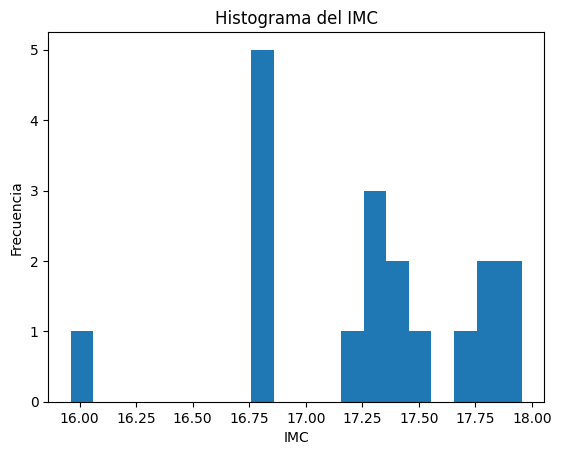

In [84]:
plt.hist(df_filtrado['imc'], bins=20)
plt.title('Histograma del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [85]:
df_filtrado.valor_seguro.mean()

7420.4409888888895

In [86]:
# Personas saludables 

df_filtrado1 = df[(df['imc'] >= 19) & (df['imc'] < 25)]
df_filtrado1

,edad,sexo,imc,hijos,fumador,region,valor_seguro
5,33,1,22.705,0,0,2,21984.47061
17,19,1,24.600,1,0,0,1837.23700
19,23,1,23.845,0,0,3,2395.17155
28,63,0,23.085,0,0,3,14451.83515
37,19,1,20.425,0,0,2,1625.43375
...,...,...,...,...,...,...,...
1311,42,1,24.605,2,1,3,21259.37795
1313,29,0,21.850,0,1,3,16115.30450
1321,30,0,23.655,3,1,2,18765.87545
1323,19,0,20.600,0,0,0,1731.67700


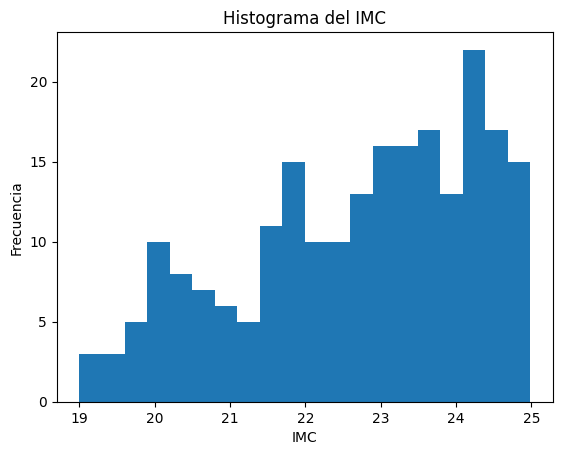

In [87]:
plt.hist(df_filtrado1['imc'], bins=20)
plt.title('Histograma del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [88]:
df_filtrado1.valor_seguro.mean()

10492.568082477477

In [89]:
# Personas con  sobrepeso 

df_filtrado2 = df[(df['imc'] >= 25) & (df['imc'] < 30)]
df_filtrado2

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,0,27.90,0,1,0,16884.9240
1,19,0,27.90,0,1,0,16884.9240
2,19,0,27.90,0,1,0,16884.9240
6,32,1,28.88,0,0,2,3866.8552
7,31,0,25.74,0,0,1,3756.6216
...,...,...,...,...,...,...,...
1341,19,0,27.90,0,1,0,16884.9240
1345,19,0,27.90,0,1,0,16884.9240
1346,21,0,25.80,0,0,0,2007.9450
1347,61,0,29.07,0,1,2,29141.3603


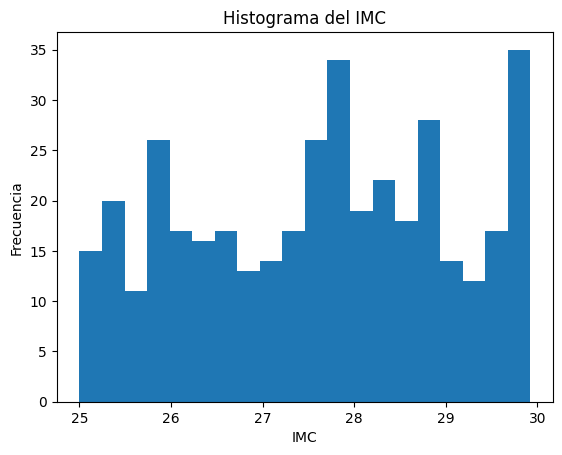

In [90]:
plt.hist(df_filtrado2['imc'], bins=20)
plt.title('Histograma del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [91]:
df_filtrado2.valor_seguro.mean()

11081.2596446266

In [92]:
# Personas con obesidad tipo 1 
df_filtrado3 = df[(df['imc'] >= 30) & (df['imc'] < 35)]
df_filtrado3


,edad,sexo,imc,hijos,fumador,region,valor_seguro
3,18,1,33.77,1,0,1,1725.55230
4,28,1,33.00,3,0,1,4449.46200
8,46,0,33.44,1,0,1,8240.58960
14,23,1,34.40,0,0,0,1826.84300
18,52,0,30.78,1,0,3,10797.33620
...,...,...,...,...,...,...,...
1333,42,0,32.87,0,0,3,7050.02130
1334,51,1,30.03,1,0,1,9377.90470
1338,23,0,33.40,0,0,0,10795.93733
1342,50,1,30.97,3,0,2,10600.54830


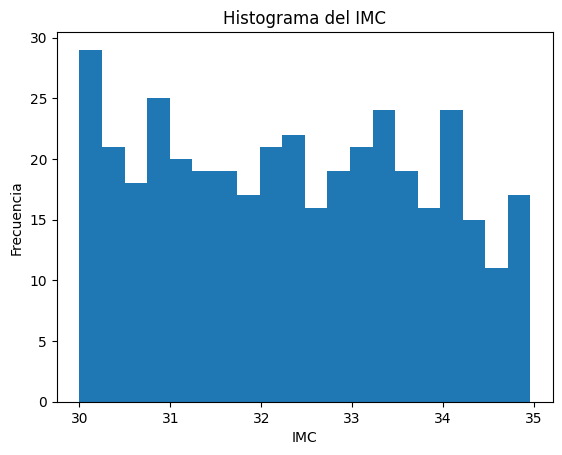

In [93]:
plt.hist(df_filtrado3['imc'], bins=20)
plt.title('Histograma del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [94]:
df_filtrado3.valor_seguro.mean()

14523.740847633588

In [95]:
#Personas con obesidad tipo 2 
df_filtrado4 = df[(df['imc'] >= 35) & (df['imc'] < 40)]
df_filtrado4

,edad,sexo,imc,hijos,fumador,region,valor_seguro
15,56,0,39.820,0,0,1,11090.71780
21,30,1,35.300,0,1,0,36837.46700
22,60,0,36.005,0,0,3,13228.84695
31,31,1,36.300,2,1,0,38711.00000
32,22,1,35.600,0,1,0,35585.57600
...,...,...,...,...,...,...,...
1295,20,1,39.400,2,1,0,38344.56600
1325,35,1,39.710,4,0,3,19496.71917
1329,62,1,38.830,0,0,1,12981.34570
1336,52,1,38.600,2,0,0,10325.20600


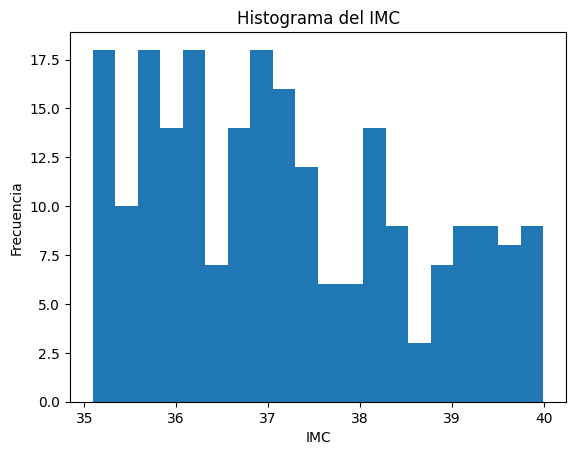

In [96]:
plt.hist(df_filtrado4['imc'], bins=20)
plt.title('Histograma del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [97]:
df_filtrado4.valor_seguro.mean()

17022.25888271111

In [98]:
#Personas con obesidad tipo 3 
df_filtrado5 = df[(df['imc'] > 40) ]
df_filtrado5

,edad,sexo,imc,hijos,fumador,region,valor_seguro
16,27,1,42.13,0,1,1,39611.7577
20,56,1,40.30,0,0,0,10602.3850
85,48,0,41.23,4,0,2,11033.6617
118,58,1,49.06,0,0,1,11381.3254
172,63,1,41.47,0,0,1,13405.3903
...,...,...,...,...,...,...,...
1247,52,1,41.80,2,1,1,47269.8540
1319,34,1,42.90,1,0,0,4536.2590
1324,18,1,53.13,0,0,1,1163.4627
1330,42,0,40.37,2,1,1,43896.3763


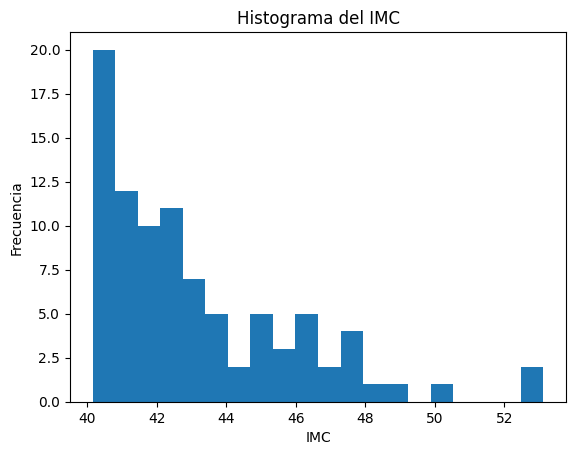

In [99]:
plt.hist(df_filtrado5['imc'], bins=20)
plt.title('Histograma del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

In [100]:
df_filtrado5.valor_seguro.mean()

16784.615546483517

# ML model

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
df_f = df.iloc[:, :df.shape[1]-2]
df_f



,edad,sexo,imc,hijos,fumador
0,19,0,27.90,0,1
1,19,0,27.90,0,1
2,19,0,27.90,0,1
3,18,1,33.77,1,0
4,28,1,33.00,3,0
...,...,...,...,...,...
1344,18,0,36.85,0,0
1345,19,0,27.90,0,1
1346,21,0,25.80,0,0
1347,61,0,29.07,0,1


In [104]:
df_O = df.iloc[:, -1]
df_O

0       16884.9240
1       16884.9240
2       16884.9240
3        1725.5523
4        4449.4620
           ...    
1344     1629.8335
1345    16884.9240
1346     2007.9450
1347    29141.3603
1348    16884.9240
Name: valor_seguro, Length: 1349, dtype: float64

In [105]:
X = df_f
y = df_O

In [106]:
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Arbol de decisiones

In [111]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X, y)

DecisionTreeRegressor()

In [112]:
print(DT_model.predict(X.head()))
print(df.valor_seguro.head())

[16884.924  16884.924  16884.924   1725.5523  4449.462 ]
0    16884.9240
1    16884.9240
2    16884.9240
3     1725.5523
4     4449.4620
Name: valor_seguro, dtype: float64


### Comparativo 

In [114]:
y_pred = DT_model.predict(X=df[["edad","sexo","imc","hijos","fumador"]])

In [ ]:
df.insert (0, "Pred_DT", y_pred)


In [117]:
df

,Pred_DT,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,16884.9240,19,0,27.90,0,1,0,16884.9240
1,16884.9240,19,0,27.90,0,1,0,16884.9240
2,16884.9240,19,0,27.90,0,1,0,16884.9240
3,1725.5523,18,1,33.77,1,0,1,1725.5523
4,4449.4620,28,1,33.00,3,0,1,4449.4620
...,...,...,...,...,...,...,...,...
1344,1629.8335,18,0,36.85,0,0,1,1629.8335
1345,16884.9240,19,0,27.90,0,1,0,16884.9240
1346,2007.9450,21,0,25.80,0,0,0,2007.9450
1347,29141.3603,61,0,29.07,0,1,2,29141.3603


In [118]:
Columns =df.Pred_DT, df.valor_seguro
rows = ["Pred_DT","valor_seguro"]
data_p= pd.DataFrame(Columns,rows)
data_p.head()

,0,1,2,3,4,5,6,7,8,9,...,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348
Pred_DT,16884.924,16884.924,16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,...,11411.685,16884.924,16884.924,10600.5483,2205.9808,1629.8335,16884.924,2007.945,29141.3603,16884.924
valor_seguro,16884.924,16884.924,16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,...,11411.685,16884.924,16884.924,10600.5483,2205.9808,1629.8335,16884.924,2007.945,29141.3603,16884.924


In [122]:
score = DT_model.score(X,y)

In [124]:
Columns =score*100, 
rows = ["DT_model"]
data_pr= pd.DataFrame(Columns,rows)
data_pr.rename(columns={0: 'Score'}, inplace=True)
data_pr

,Score
DT_model,99.868355
